# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
models_runner_1 = TC_BR_Runner()
lsi_model_1 = models_runner_1.run_lsi_model()
lda_model_1 = models_runner_1.run_lda_model()
bm25_model_1 = models_runner_1.run_bm25_model()
w2v_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_union_df())
evals_df_1 = evaluator_1.run_evaluator(models=[lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1])

TestCases.shape: (207, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpertVolunteers_UNION.shape: (207, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_1

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,41.76,2.29,4.25,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_3_cosine_0.0,42.86,7.18,11.69,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_5_cosine_0.0,42.64,11.78,17.34,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.0,36.26,18.77,23.10,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lda,top_1_cosine_0.0,9.89,0.39,0.74,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
5,lda,top_3_cosine_0.0,6.59,0.83,1.38,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
6,lda,top_5_cosine_0.0,7.69,1.77,2.66,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
7,lda,top_10_cosine_0.0,8.79,4.15,5.08,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
8,bm25,top_1_cosine_0.0,28.57,1.60,2.95,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
9,bm25,top_3_cosine_0.0,27.84,4.24,7.06,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Plots

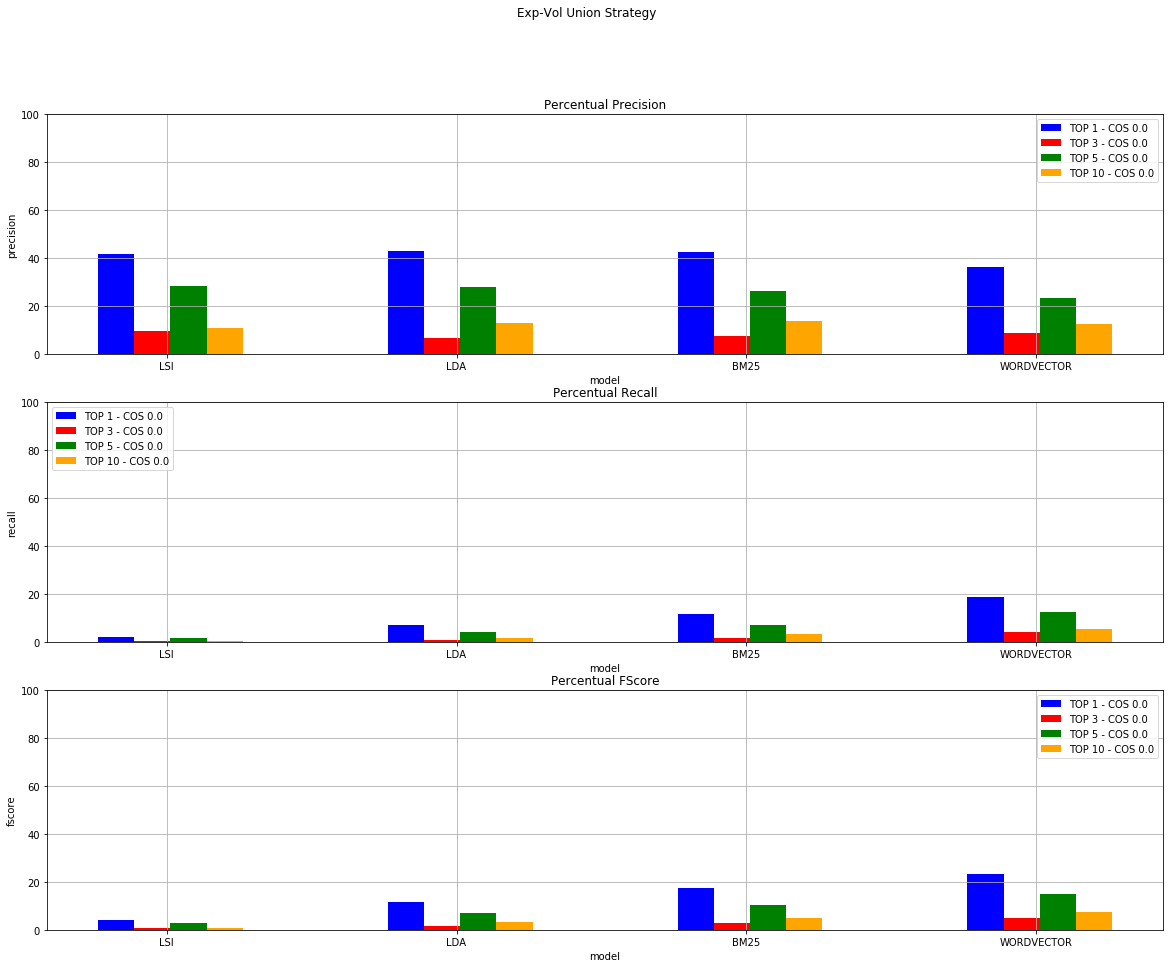

In [4]:
evaluator_1.plot_evaluations_1(evals_df=evals_df_1, title='Exp-Vol Union Strategy')

### Delete Variables

In [5]:
del lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1
del evals_df_1
del models_runner_1, evaluator_1

## Intersec Strategy

In [6]:
models_runner_2 = TC_BR_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()
lda_model_2 = models_runner_2.run_lda_model()
bm25_model_2 = models_runner_2.run_bm25_model()
w2v_model_2 = models_runner_2.run_word2vec_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_intersec_df())
evals_df_2 = evaluator_2.run_evaluator(models=[lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2])

TestCases.shape: (207, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpertVolunteers_INTERSEC.shape: (207, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [7]:
evals_df_2

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,24.18,1.98,3.58,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_3_cosine_0.0,22.71,5.84,8.86,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_5_cosine_0.0,22.86,9.66,12.87,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.0,18.13,13.78,14.85,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lda,top_1_cosine_0.0,1.10,0.08,0.16,precision recall fscore Bug_...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
5,lda,top_3_cosine_0.0,1.10,0.22,0.37,precision recall fscore Bug_...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
6,lda,top_5_cosine_0.0,1.76,0.65,0.91,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
7,lda,top_10_cosine_0.0,1.87,1.43,1.52,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
8,bm25,top_1_cosine_0.0,10.99,0.83,1.52,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
9,bm25,top_3_cosine_0.0,11.36,2.51,3.94,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Plots

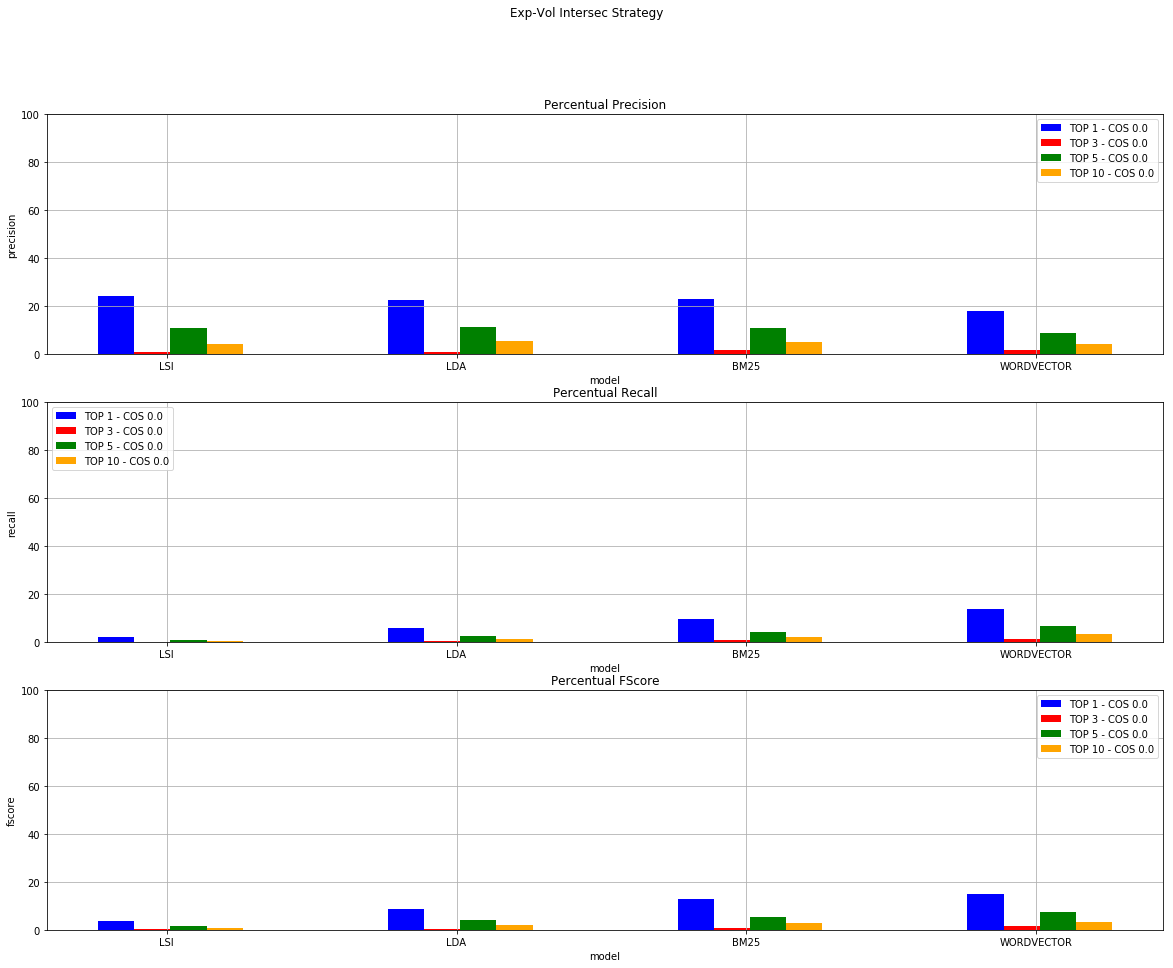

In [8]:
evaluator_2.plot_evaluations_1(evals_df=evals_df_2, title='Exp-Vol Intersec Strategy')

### Delete Variables

In [9]:
del lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2
del evals_df_2
del models_runner_2, evaluator_2

## Expert Only Strategy

In [10]:
models_runner_3 = TC_BR_Runner()
lsi_model_3 = models_runner_3.run_lsi_model()
lda_model_3 = models_runner_3.run_lda_model()
bm25_model_3 = models_runner_3.run_bm25_model()
w2v_model_3 = models_runner_3.run_word2vec_model()

evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_df())
evals_df_3 = evaluator_3.run_evaluator(models=[lsi_model_3,lda_model_3,bm25_model_3,w2v_model_3])

TestCases.shape: (207, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleExpert.shape: (207, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [11]:
evals_df_3

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,34.07,2.72,4.89,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_3_cosine_0.0,37.36,8.83,13.49,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_5_cosine_0.0,36.92,14.04,18.99,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.0,30.88,21.01,23.31,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lda,top_1_cosine_0.0,3.30,0.24,0.44,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
5,lda,top_3_cosine_0.0,2.56,0.47,0.79,precision recall fscore Bu...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
6,lda,top_5_cosine_0.0,3.74,1.16,1.70,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
7,lda,top_10_cosine_0.0,4.07,2.24,2.72,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
8,bm25,top_1_cosine_0.0,19.78,1.53,2.76,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
9,bm25,top_3_cosine_0.0,20.51,4.29,6.71,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Plots

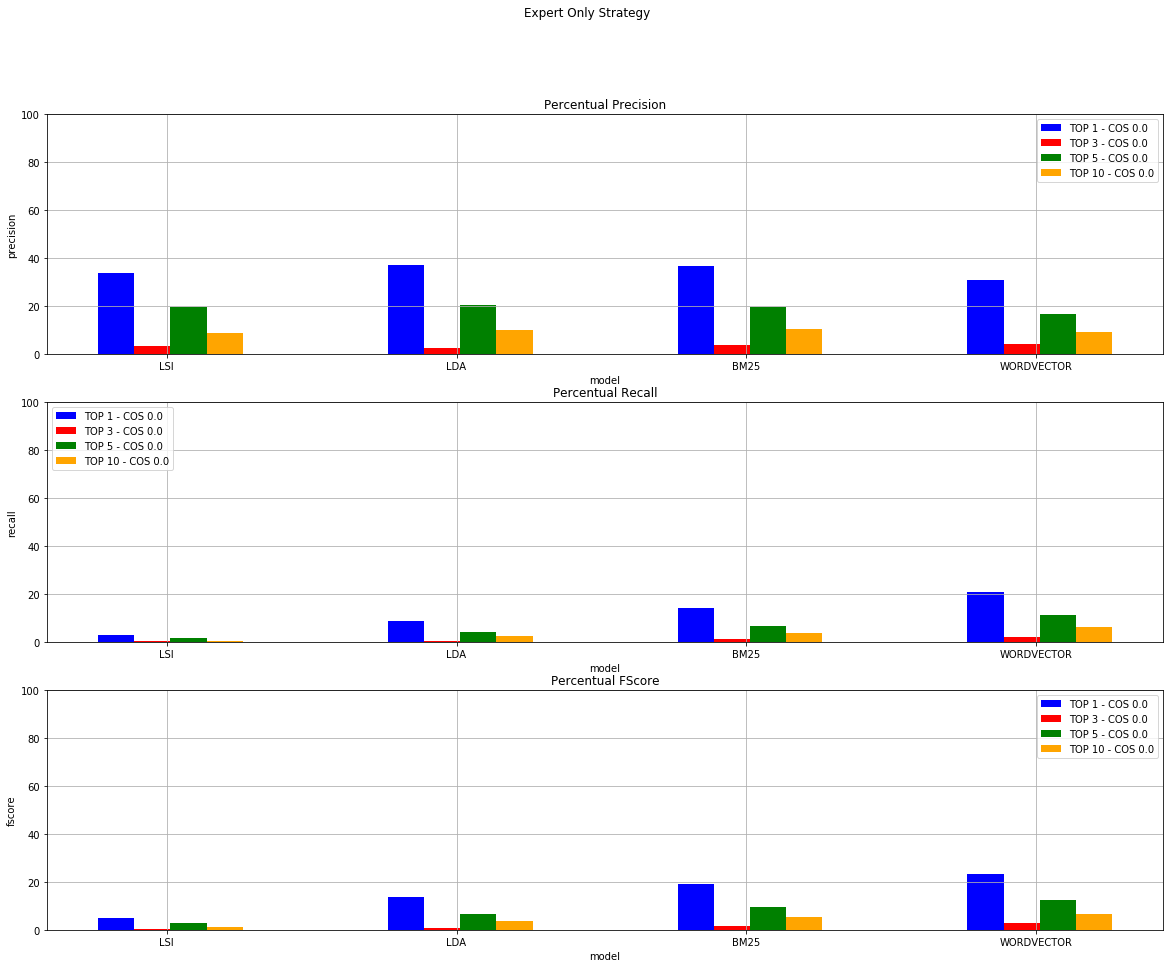

In [12]:
evaluator_3.plot_evaluations_1(evals_df=evals_df_3, title='Expert Only Strategy')

### Delete Variables

In [13]:
del lsi_model_3, lda_model_3, bm25_model_3, w2v_model_3
del evals_df_3
del models_runner_3, evaluator_3

## Volunteers Only Strategy

In [14]:
models_runner_4 = TC_BR_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df())
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4])

TestCases.shape: (207, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (207, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [15]:
evals_df_4

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,31.87,2.04,3.76,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_3_cosine_0.0,28.21,5.83,9.20,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_5_cosine_0.0,28.57,9.78,13.74,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.0,23.52,14.87,17.07,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lda,top_1_cosine_0.0,6.59,0.34,0.65,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
5,lda,top_3_cosine_0.0,6.96,1.14,1.83,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
6,lda,top_5_cosine_0.0,7.47,2.18,3.10,precision recall fscore ...,0.0,5.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
7,lda,top_10_cosine_0.0,6.70,3.73,4.34,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
8,bm25,top_1_cosine_0.0,19.78,1.51,2.72,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
9,bm25,top_3_cosine_0.0,18.68,3.76,5.93,precision recall fscore ...,0.0,3.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Plots

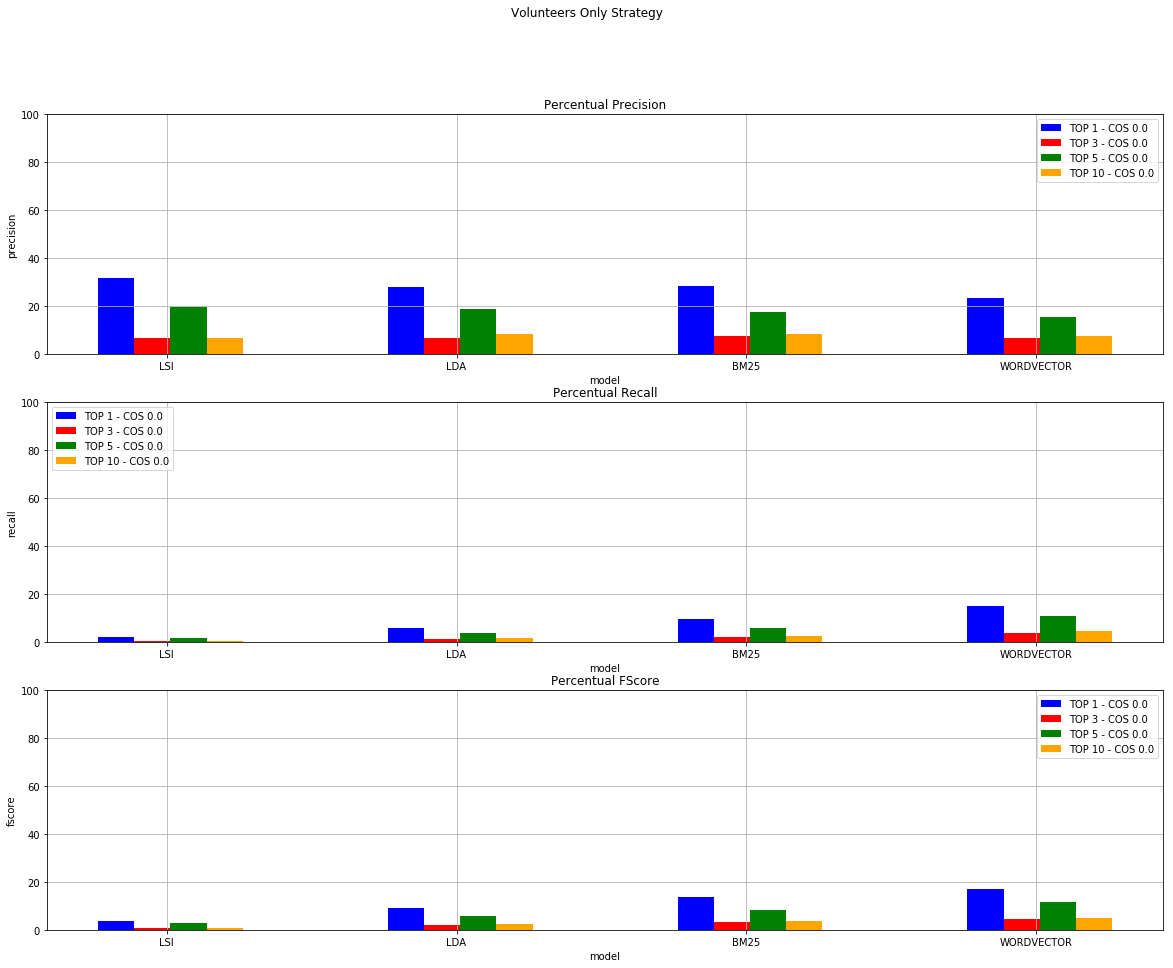

In [16]:
evaluator_4.plot_evaluations_1(evals_df=evals_df_4, title='Volunteers Only Strategy')

### Delete Variables

In [18]:
del lsi_model_4, lda_model_4, bm25_model_4, w2v_model_4
del evals_df_4
del models_runner_4, evaluator_4

NameError: name 'lsi_model_4' is not defined